<a href="https://colab.research.google.com/github/C23-PS237/TaniKami-Machine-Learning/blob/main/%5BMobileNet%5DPlant_Disease_Classification_TaniKami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shantym169dsy1532","key":"980f36e2fa8f5f843ecc7cc0db92d09d"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          18691        517  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39           1143         41  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           1938         44  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:16<00:00, 21.3MB/s]
100% 2.70G/2.70G [02:16<00:00, 21.3MB/s]


In [ ]:
!mkdir Dataset
!unzip -q /content/new-plant-diseases-dataset.zip -d /content/Dataset

In [ ]:
!rm /content/new-plant-diseases-dataset.zip

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
batch_size = 32
epochs = 25

In [ ]:
base_dir = "/content/Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "valid")

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             fill_mode="nearest")
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0) 

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               )
val_data = val_datagen.flow_from_directory(val_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

In [ ]:
base_model =  tf.keras.applications.MobileNet(weights="imagenet",
                                              include_top= False,
                                              input_shape = input_shape)
base_model.trainable = False

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
inputs = keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(len(categories), activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")

In [ ]:
optimizer =  keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
              loss = keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy(),'accuracy'])

In [ ]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


150/150 [==============================] - 92s 546ms/step - loss: 1.9675 - categorical_accuracy: 0.4796 - accuracy: 0.4796 - val_loss: 0.8118 - val_categorical_accuracy: 0.7947 - val_accuracy: 0.7947
Epoch 2/25
150/150 [==============================] - 109s 724ms/step - loss: 0.7748 - categorical_accuracy: 0.7869 - accuracy: 0.7869 - val_loss: 0.4932 - val_categorical_accuracy: 0.8678 - val_accuracy: 0.8678
Epoch 3/25
150/150 [==============================] - 89s 595ms/step - loss: 0.5589 - categorical_accuracy: 0.8378 - accuracy: 0.8378 - val_loss: 0.4048 - val_categorical_accuracy: 0.8844 - val_accuracy: 0.8844
Epoch 4/25
150/150 [==============================] - 76s 508ms/step - loss: 0.4724 - categorical_accuracy: 0.8615 - accuracy: 0.8615 - val_loss: 0.3138 - val_categorical_accuracy: 0.9106 - val_accuracy: 0.9106
Epoch 5/25
150/150 [==============================] - 79s 530ms/step - loss: 0.3942 - categorical_accuracy: 0.8850 - accuracy: 0.8850 - val_loss: 0.3096 - val_categor

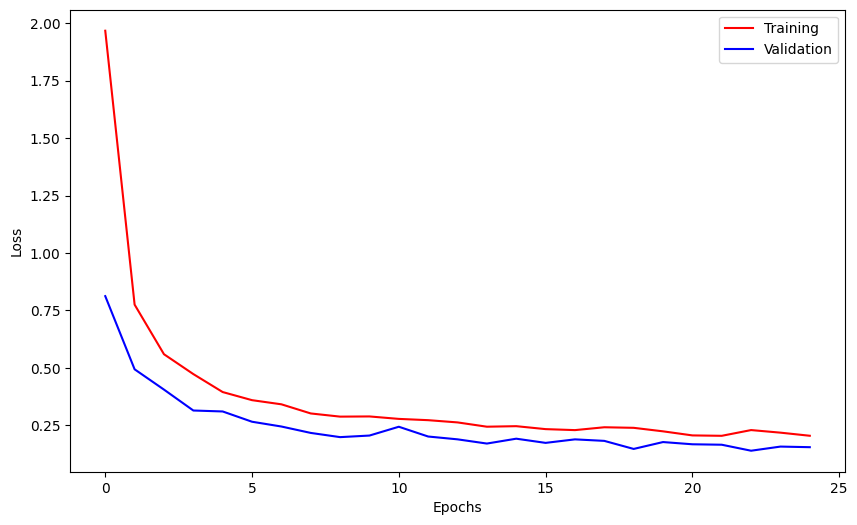

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs, loss, c="red", label="Training")
plt.plot(epochs, val_loss, c="blue", label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

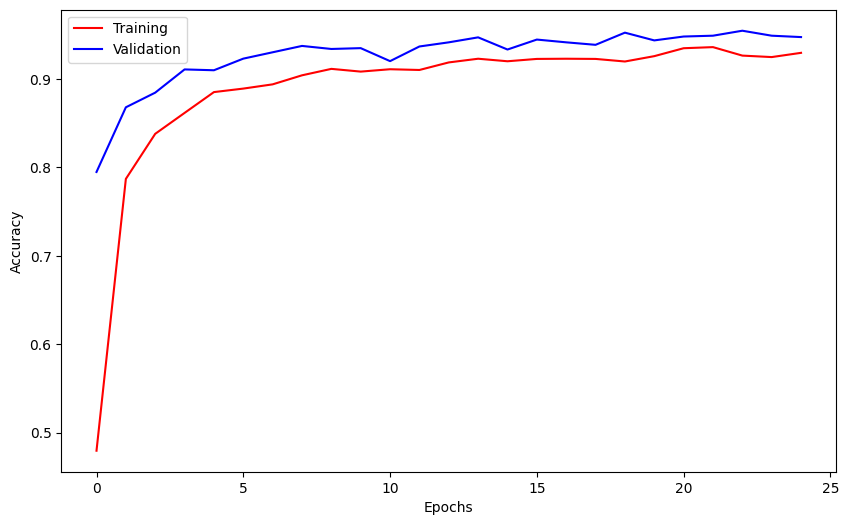

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs, acc, c="red", label="Training")
plt.plot(epochs, val_acc, c="blue", label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=target_size)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  three_max_class = np.argsort(classes)[0][-3:]
  ranks = ['third', 'second', 'most']
  for index in reversed(range(3)):
    probability = classes[0][three_max_class[index]]*100
    print(f"The {ranks[index]} likely class: {categories[three_max_class[index]]}")
    print(f"With the probability of : {probability:.2f}%")

#print(fn)
print(three_max_class)
print(classes)

Saving 000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG to 000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG
1/1 [==============================] - 0s 24ms/step
The most likely class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
With the probability of : 98.24%
The second likely class: Apple___Apple_scab
With the probability of : 0.80%
The third likely class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
With the probability of : 0.50%
[35  0  7]
[[8.0348058e-03 2.2884524e-04 1.4014205e-05 3.7782898e-05 2.5168031e-06
  5.9648762e-08 3.2413034e-06 9.8242539e-01 5.7330923e-05 6.7566609e-04
  1.6965884e-04 3.2379635e-06 2.5838992e-04 3.2057837e-06 1.2819431e-05
  3.9707651e-05 6.2192826e-06 3.6388890e-09 6.4794171e-05 2.2434159e-07
  5.0980990e-08 1.6205518e-06 3.1473121e-08 4.4018387e-07 7.9137749e-08
  1.0564061e-03 5.7724817e-04 3.0896364e-04 5.3178073e-06 2.1015787e-06
  1.5039709e-05 9.9608256e-04 5.9940558e-06 1.4747729e-07 1.4401478e-06
  4.9529267e-03 1.0599047e-05 2.755

In [ ]:
print(three_max_class)
# print(classes[0][three_max_class[2]])
for index in reversed(range(3)):
  print(index)
  print(classes[0][three_max_class[index]]*100)

[1 0 7]
2
73.1488287448883
1
17.83667504787445
0
2.8300322592258453


In [ ]:
print(categories)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
!mkdir savedModel
export_dir = 'savedModel/1'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

12961996

In [ ]:
interpreter =  tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_shape = input_details[0]['shape']
inputs, outputs = [], []

for _ in range(100):
    input_data = np.random.random_sample(input_shape).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])

    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)

    inputs.append(input_data[0, 0])
    outputs.append(output_data[0, 0])


In [ ]:
inputs[0].shape

(224, 3)

ValueError: ignored

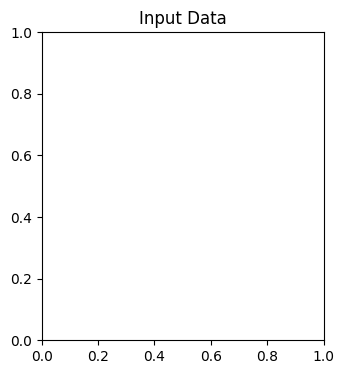

In [ ]:
import matplotlib.pyplot as plt

# Plot input data
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input Data')
plt.plot(range(len(inputs)), inputs)
plt.xlabel('Index')
plt.ylabel('Value')

# Plot output data
plt.subplot(1, 2, 2)
plt.title('Output Data')
plt.plot(range(len(outputs)), outputs)
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
